In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
def add_more_info(df):
    df['nodes'] = df['g1_nodes'] + df['g2_nodes']
    df['edges'] = df['g1_edges'] + df['g2_edges']
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['nodes^3'] = df['g1_nodes'] * df['g2_nodes'] * df['nodes'] / 2
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodesXedges'] = df['edges'] * df['nodes']

In [3]:
df = pd.read_csv("GeneralizationOnMaysData.csv")
print(df.head())

                               name  generalization_nodes  \
0  java.io.BufferedReader/Template1                   242   
1  java.io.BufferedReader/Template2                   139   
2  java.io.BufferedReader/Template3                   294   
3  java.io.BufferedReader/Template4                   239   
4            java.io.File/Template1                   144   

   generalization_edges  generalization_node_variables  \
0                   242                              0   
1                   139                             31   
2                   294                              1   
3                   239                              1   
4                   144                              5   

   generalization_edge_variables  g1_nodes  g1_edges  g2_nodes  g2_edges  time  
0                              0       242       111       242       111  1015  
1                             59       227       104       295       136  1415  
2                              1       29

In [16]:
df.describe()['time']

count       360.000000
mean       4334.272222
std       41562.183863
min           4.000000
25%         114.250000
50%         522.000000
75%        1962.250000
max      785558.000000
Name: time, dtype: float64

<Axes: ylabel='Density'>

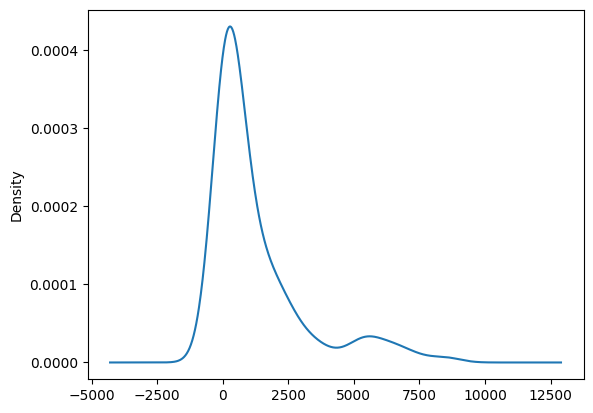

In [93]:
quantile = df['time'].quantile(0.95)
df[df['time'] < quantile]['time'].plot(kind='kde')

<Axes: ylabel='Frequency'>

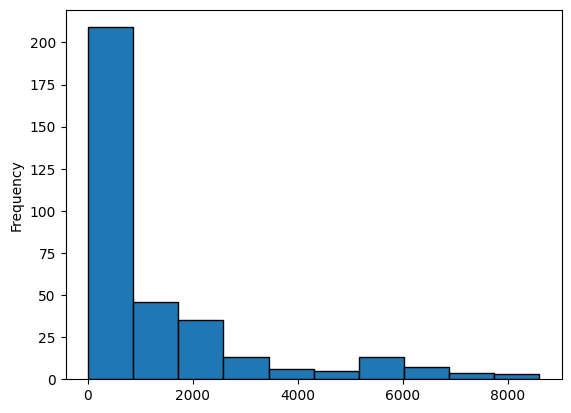

In [94]:
df[df['time'] < quantile]['time'].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

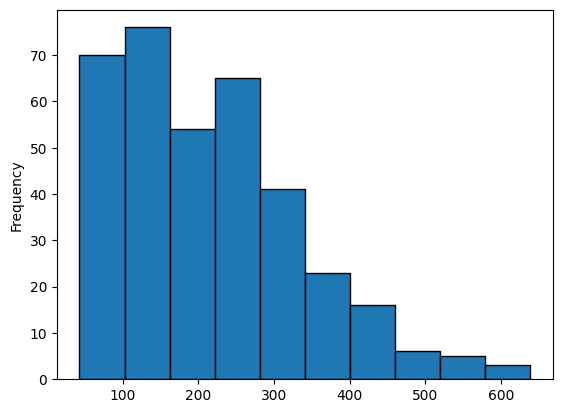

In [15]:
df['g1_nodes'].plot(kind='hist', edgecolor='black')

<Axes: xlabel='generalization_nodes', ylabel='time'>

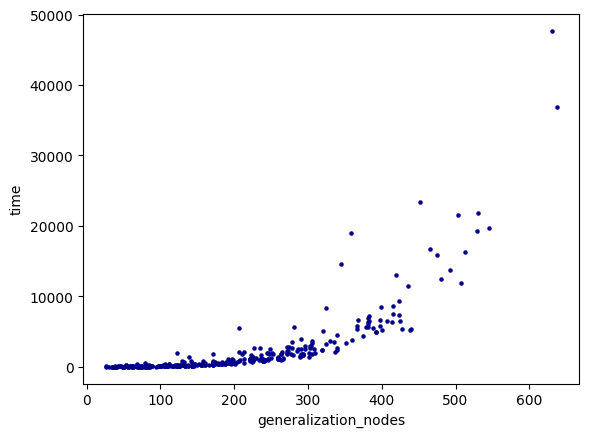

In [96]:
df.plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5)

<Axes: xlabel='generalization nodes', ylabel='time (ms)'>

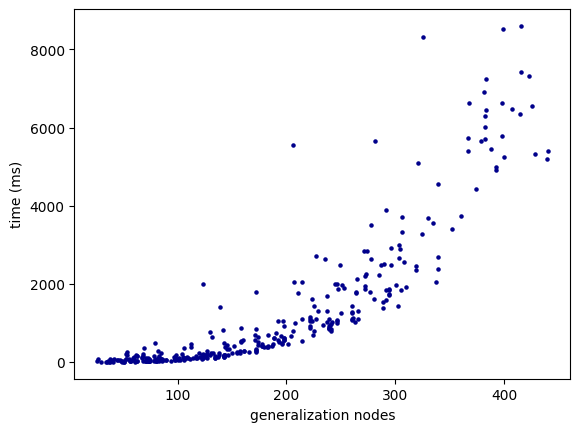

In [95]:
df[df['time'] < quantile].plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization nodes')

<Axes: xlabel='generalization_edges', ylabel='time'>

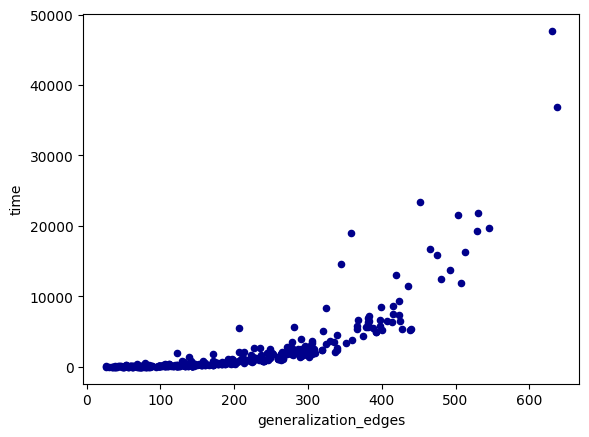

In [20]:
df.plot.scatter(x='generalization_edges', y='time', c='DarkBlue')

<Axes: xlabel='generalization_node_variables', ylabel='time'>

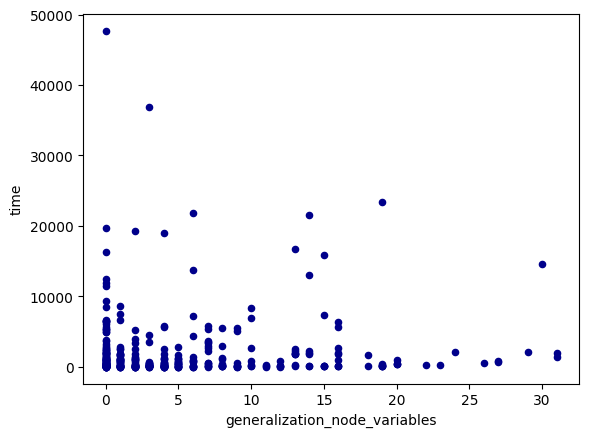

In [21]:
df.plot.scatter(x='generalization_node_variables', y='time', c='DarkBlue')

<Axes: xlabel='generalization_edge_variables', ylabel='time'>

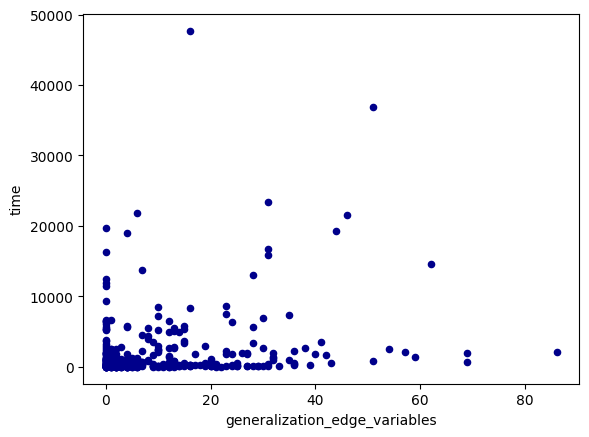

In [22]:
df.plot.scatter(x='generalization_edge_variables', y='time', c='DarkBlue')

<Axes: xlabel='g1_nodes', ylabel='time'>

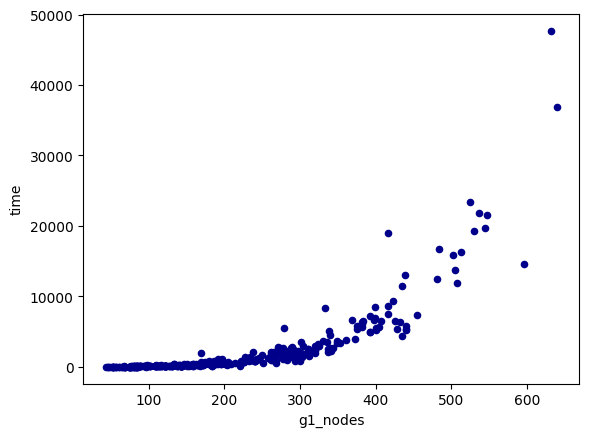

In [23]:
df.plot.scatter(x='g1_nodes', y='time', c='DarkBlue')

<Axes: xlabel='g2_nodes', ylabel='time'>

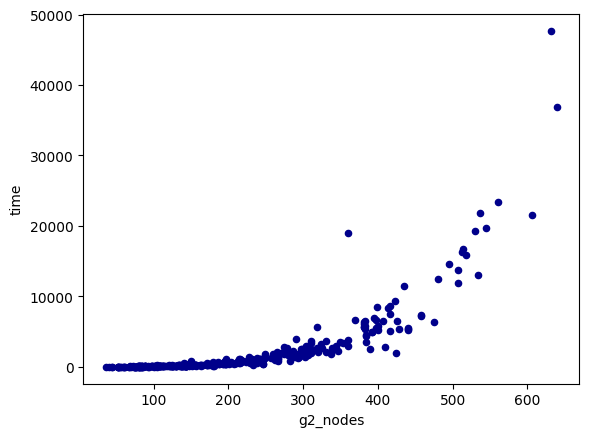

In [24]:
df.plot.scatter(x='g2_nodes', y='time', c='DarkBlue')

<Axes: xlabel='nodes', ylabel='time'>

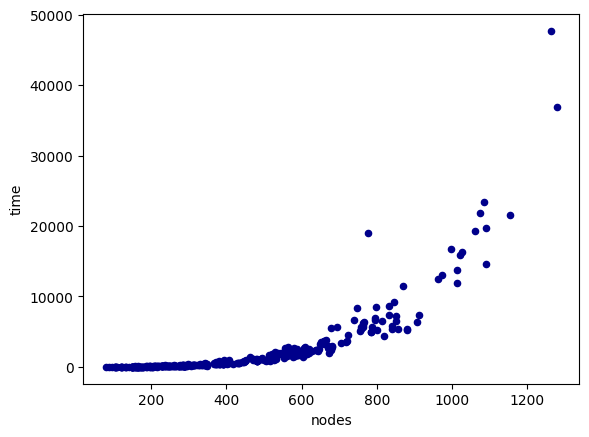

In [26]:
df.plot.scatter(x='nodes', y='time', c='DarkBlue')

<Axes: xlabel='edges', ylabel='time'>

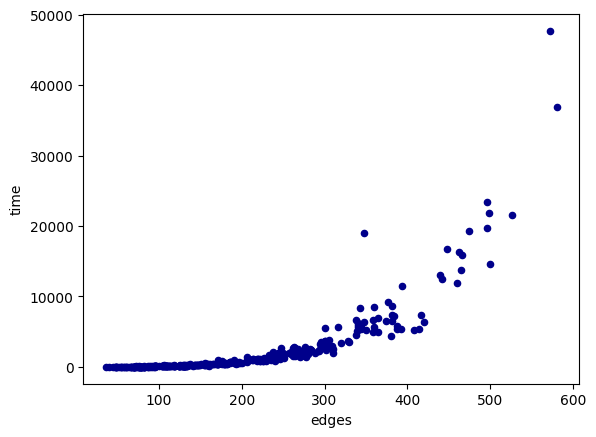

In [27]:
df.plot.scatter(x='edges', y='time', c='DarkBlue')

<Axes: xlabel='nodes^2', ylabel='time'>

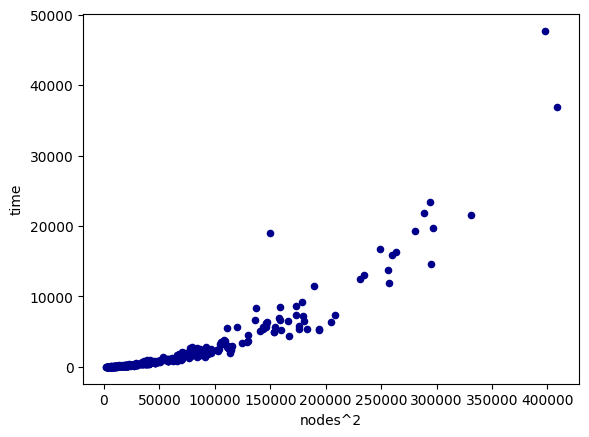

In [29]:
df.plot.scatter(x='nodes^2', y='time', c='DarkBlue')

<Axes: xlabel='edges^2', ylabel='time'>

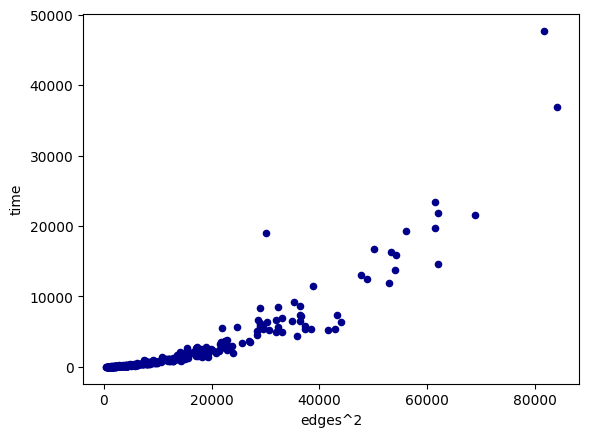

In [30]:
df.plot.scatter(x='edges^2', y='time', c='DarkBlue')

<Axes: xlabel='nodesXedges', ylabel='time'>

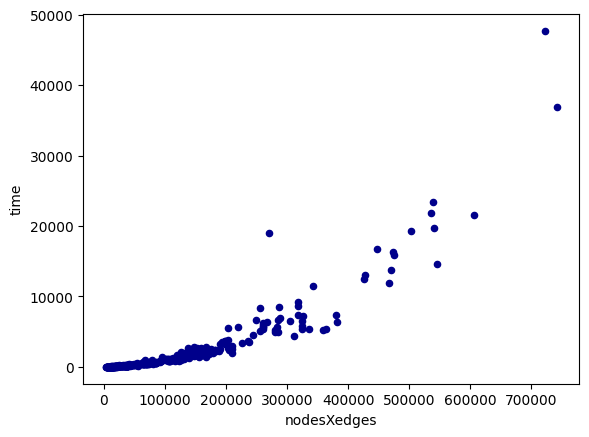

In [31]:
df.plot.scatter(x='nodesXedges', y='time', c='DarkBlue')

In [7]:
df2 = pd.read_csv("AUASTOnMaysData.csv")
print(df2.head())

                               name  time
0  java.io.BufferedReader/Template1   684
1  java.io.BufferedReader/Template2   721
2  java.io.BufferedReader/Template3   789
3  java.io.BufferedReader/Template4   820
4           java.io.File/Template10  1111


<Axes: ylabel='Frequency'>

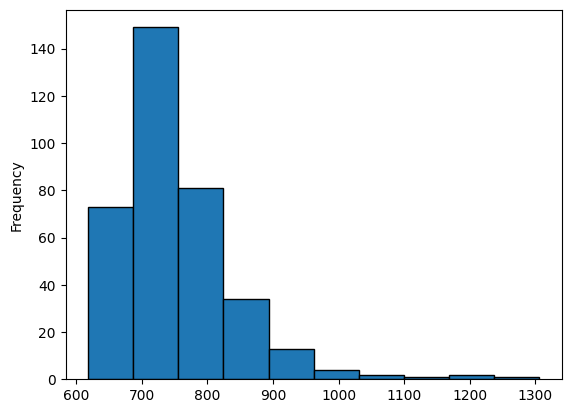

In [35]:
df2['time'].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

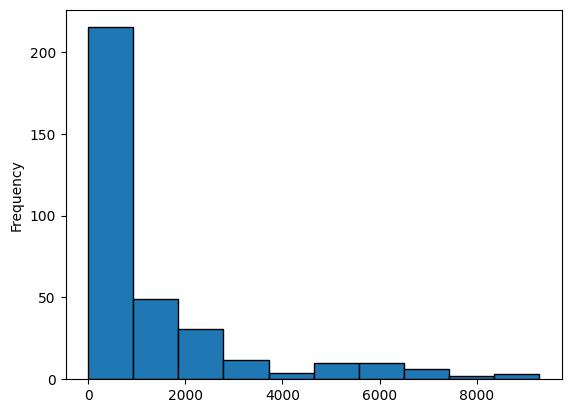

In [37]:
df[df['time'] < 10000]['time'].plot(kind='hist', edgecolor='black')

In [8]:
merged = pd.merge(df, df2, on='name', how='inner')
merged

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time_x,time_y
0,java.io.BufferedReader/Template1,242,242,0,0,242,111,242,111,1015,684
1,java.io.BufferedReader/Template2,139,139,31,59,227,104,295,136,1415,721
2,java.io.BufferedReader/Template3,294,294,1,1,295,136,295,136,1844,789
3,java.io.BufferedReader/Template4,239,239,1,1,240,111,240,111,860,820
4,java.io.File/Template1,144,144,5,7,158,74,179,84,386,676
...,...,...,...,...,...,...,...,...,...,...,...
355,twitter4j.User/Template1,260,260,2,4,262,120,262,120,1064,741
356,twitter4j.User/Template2,291,291,2,8,373,171,291,134,3880,725
357,twitter4j.User/Template3,245,245,13,27,320,145,275,126,1996,692
358,twitter4j.User/Template4,367,367,7,15,375,170,383,174,5407,796


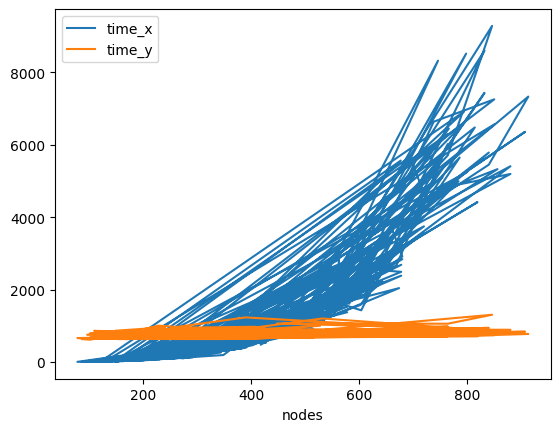

In [109]:
import matplotlib.pyplot as plt
merged[merged['time_x'] < 10000].plot(x="nodes", y=["time_x", "time_y"])
plt.show()

In [59]:
cdf = pd.read_csv("GeneralizationOnCodeSearchNetData.csv")
ocdf = pd.read_csv("OptimizedGeneralizationOnCodeSearchNetData.csv")
ocdf2 = pd.read_csv("OptimizedGeneralizationOnCodeSearchNetDataV2.csv")
ocdf['g1_edges'] = ocdf2['g1_edges']
ocdf['g2_edges'] = ocdf2['g2_edges']
ocdf['generalization_edges'] = ocdf2['generalization_edges']
cdf2 = pd.read_csv("AUASTOnCodeSearchNetData.csv")
ocdf.head()

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time
0,0,35,27,11,22,72,71,171,170,90
1,1,59,48,18,38,131,130,124,123,124
2,10,80,72,22,36,137,136,229,228,189
3,1000,63,55,17,31,116,115,151,150,130
4,1001,39,30,13,23,230,229,109,108,221


In [60]:
add_more_info(cdf)
add_more_info(ocdf)

In [42]:
ocdf.describe().edges

count    9496.000000
mean      377.197873
std       151.604068
min       138.000000
25%       272.000000
50%       335.000000
75%       438.000000
max      1060.000000
Name: edges, dtype: float64

<Axes: ylabel='Density'>

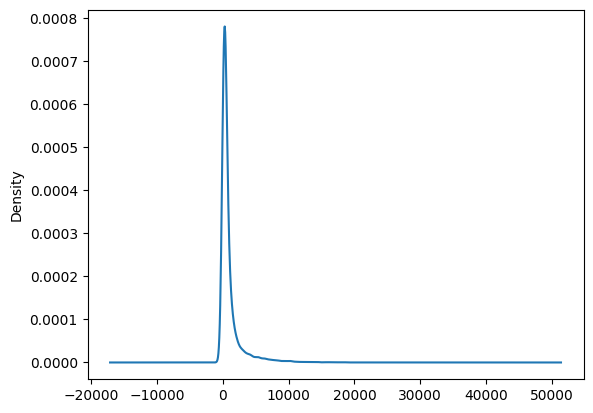

In [19]:
cdf['time'].plot(kind='kde')

<Axes: ylabel='Frequency'>

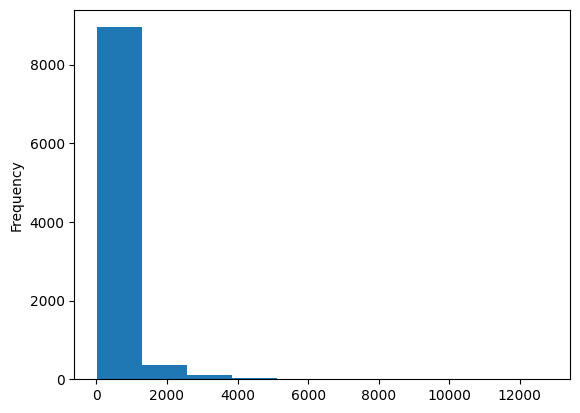

In [6]:
cdf['time'].plot(kind='hist')

<Axes: xlabel='nodes', ylabel='time (ms)'>

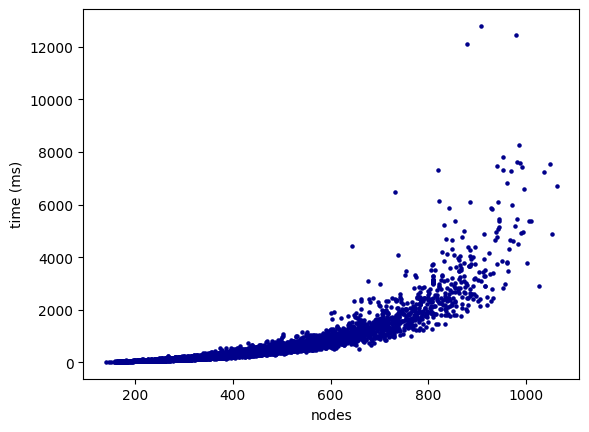

In [7]:
cdf.plot.scatter(x='nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)')

In [8]:
print('Sum:', cdf['time'].sum(), 'ms =', cdf['time'].sum() / 1000, 's =', cdf['time'].sum() / 60000, 'm')
cdf.describe()['time']

Sum: 3725139 ms = 3725.139 s = 62.08565 m


count     9496.000000
mean       392.285067
std        688.611537
min         17.000000
25%        106.000000
50%        182.000000
75%        374.000000
max      12793.000000
Name: time, dtype: float64

<Axes: xlabel='generalization nodes', ylabel='time (ms)'>

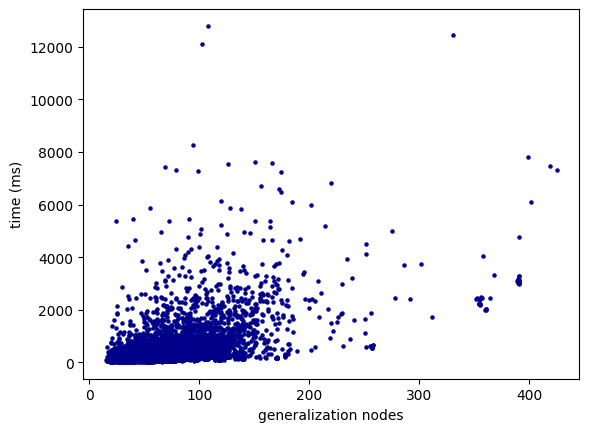

In [9]:
quantile = cdf['time'].quantile(0.95)
cdf.plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization nodes')

<Axes: xlabel='generalization node variables', ylabel='time (ms)'>

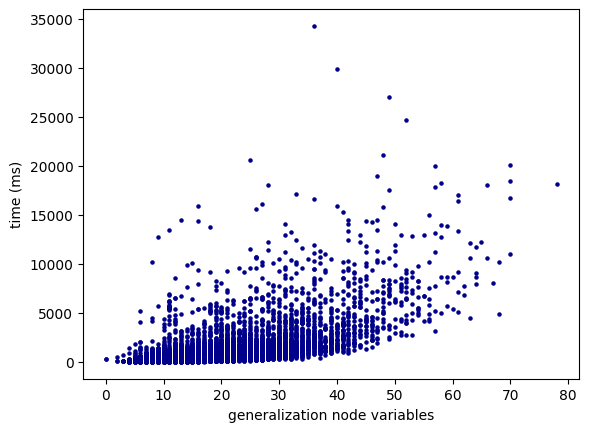

In [104]:
cdf.plot.scatter(x='generalization_node_variables', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization node variables')

<Axes: xlabel='generalization edge variables', ylabel='time (ms)'>

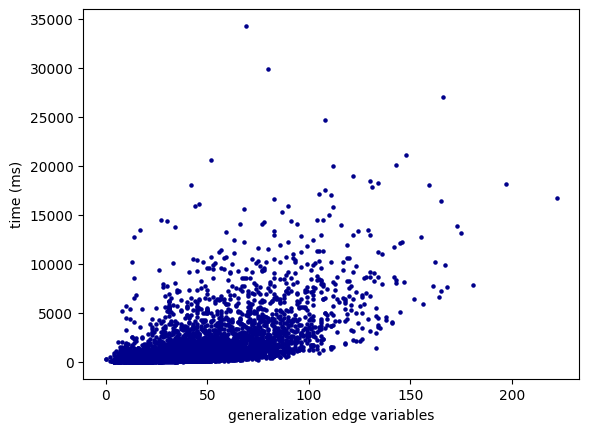

In [103]:
cdf.plot.scatter(x='generalization_edge_variables', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization edge variables')

<Axes: xlabel='edges', ylabel='time'>

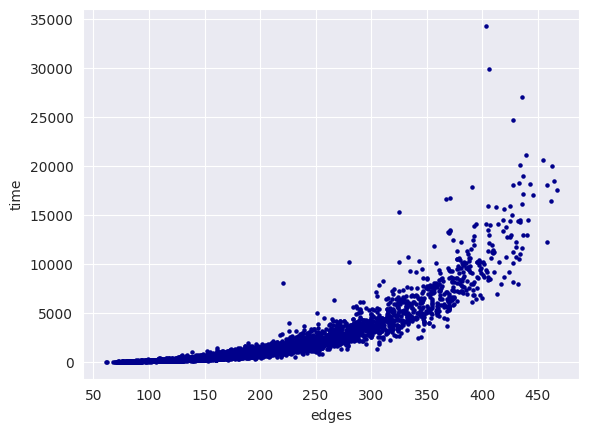

In [43]:
cdf.plot.scatter(x='edges', y='time', c='DarkBlue', s=5)

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

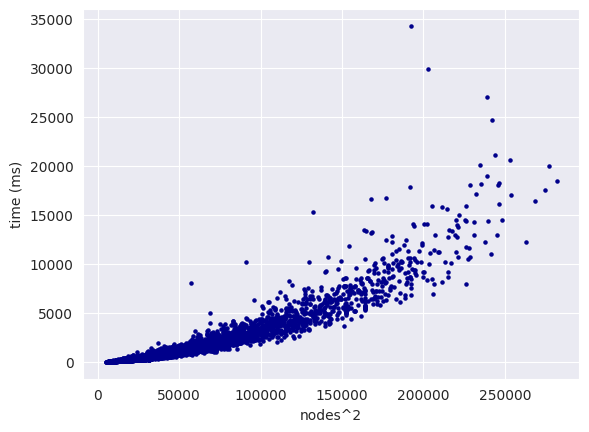

In [44]:
cdf.plot.scatter(x='nodes^2', y='time', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

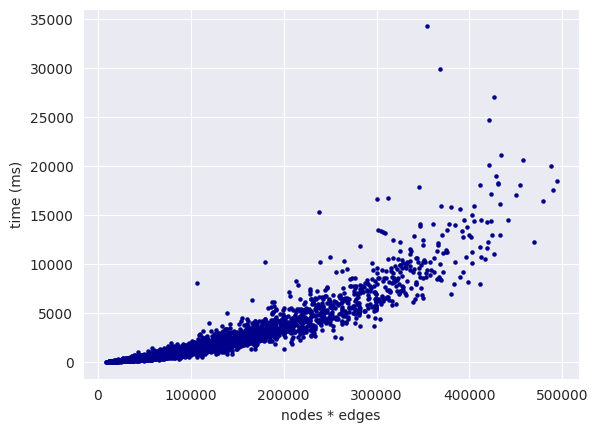

In [45]:
cdf.plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

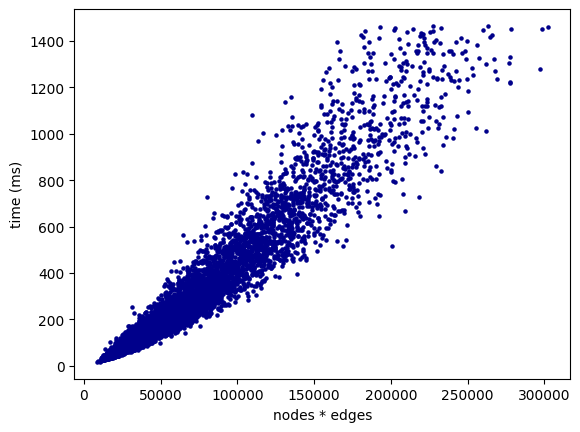

In [12]:
quantile = cdf['time'].quantile(0.95)
cdf[cdf['time'] < quantile].plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes', ylabel='time (ms)'>

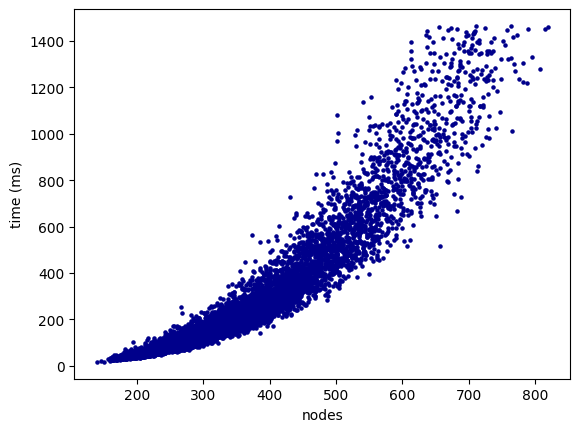

In [16]:
cdf[cdf['time'] < quantile].plot.scatter(x='nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

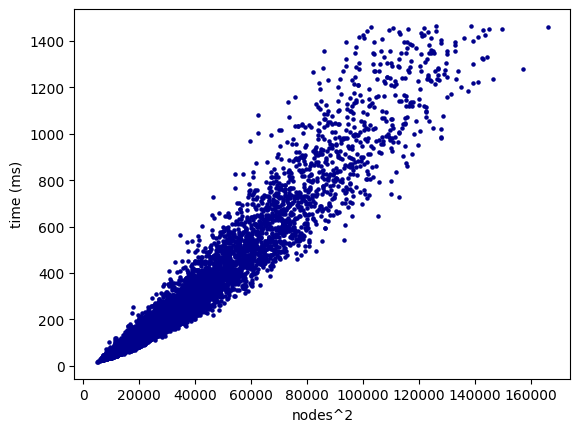

In [14]:
cdf[cdf['time'] < quantile].plot.scatter(x='nodes^2', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes^2')

<Axes: xlabel='nodes^3', ylabel='time (ms)'>

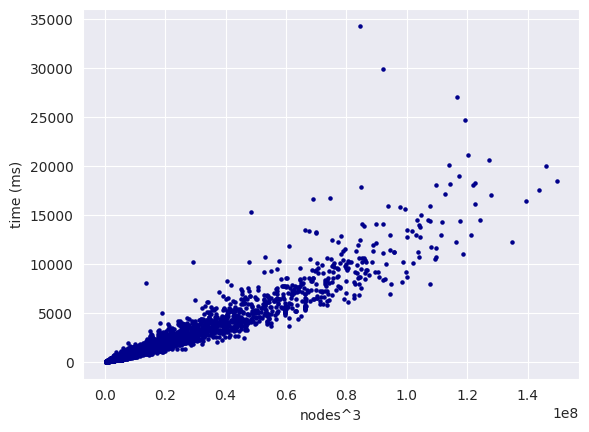

In [28]:
cdf.plot.scatter(x='nodes^3', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes^3')

In [127]:
cdf2.time.describe()

count    9625.000000
mean      780.155429
std       141.525998
min       609.000000
25%       693.000000
50%       738.000000
75%       814.000000
max      2525.000000
Name: time, dtype: float64

In [125]:
cdf2.time.sum() / 1000

7508.996

In [126]:
cdf2.time.sum() / 60000

125.14993333333334

In [33]:
merged = pd.merge(cdf, ocdf, on='name', how='inner')
merged = pd.merge(merged, cdf2, on='name', how='inner')
merged

,name,generalization_nodes_x,generalization_edges_x,generalization_node_variables_x,generalization_edge_variables_x,g1_nodes_x,g1_edges_x,g2_nodes_x,g2_edges_x,time_x,...,g2_nodes_y,g2_edges_y,time_y,nodes_y,edges_y,nodes^2_y,nodes^3_y,edges^2_y,nodesXedges_y,time
0,0,35,35,11,22,72,32,171,75,136,...,171,75,90,243,107,12312,1495908.0,2400,26001,1026
1,1,59,59,18,38,131,59,124,55,210,...,124,55,124,255,114,16244,2071110.0,3245,29070,702
2,10,80,80,22,36,137,64,229,105,422,...,229,105,189,366,169,31373,5741259.0,6720,61854,701
3,1000,67,67,17,39,116,55,151,68,198,...,151,68,130,267,123,17516,2338386.0,3740,32841,766
4,1001,42,42,13,23,230,106,109,46,458,...,109,46,221,339,152,25070,4249365.0,4876,51528,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,9995,80,80,22,44,164,74,222,102,487,...,222,102,199,386,176,36408,7026744.0,7548,67936,1050
9492,9996,161,161,40,84,412,182,290,130,3447,...,290,130,1226,702,312,119480,41937480.0,23660,219024,879
9493,9997,62,62,20,37,133,59,149,67,204,...,149,67,81,282,126,19817,2794197.0,3953,35532,983
9494,9998,70,70,22,39,122,54,245,109,563,...,245,109,290,367,163,29890,5484815.0,5886,59821,1091


In [21]:
columns_to_plot = ['time_x', 'time_y', 'time']
x_metric = 'nodes_x'

merged['time_x', 'time_y', 'time'].plot.line()

# Customize the plot
plt.xlabel(x_metric)
plt.ylabel('time (ms)')
plt.title('Performance Comparison')
plt.legend()

# Display the plot
plt.show()

KeyError: ('time_x', 'time_y', 'time')

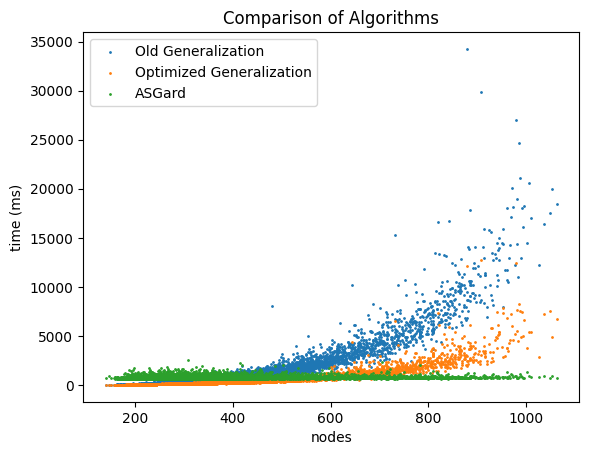

In [43]:
import matplotlib.pyplot as plt

# Create a scatter plot for all metrics
plt.scatter(cdf['nodes'], cdf['time'], label='Old Generalization', s=1)
plt.scatter(ocdf['nodes'], ocdf['time'], label='Optimized Generalization', s=1)
plt.scatter(merged['nodes_x'], merged['time'], label='ASGard', s=1)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Algorithms')
plt.legend()

# Display the plot
plt.show()

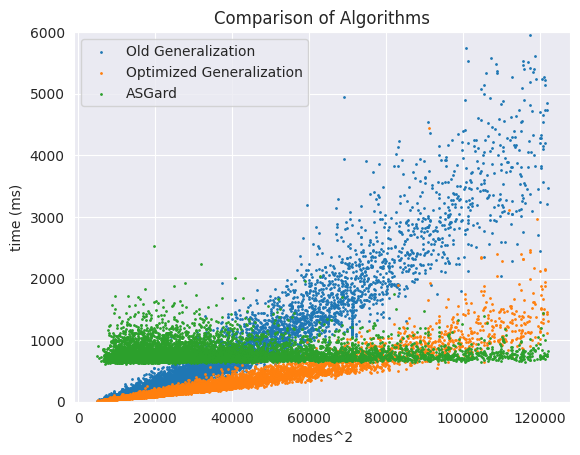

In [29]:
quantile = merged['nodes^2_x'].quantile(0.95)
plt_df = merged[merged['nodes^2_x'] < quantile]

# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes^2_x'], plt_df['time_x'], label='Old Generalization', s=1)
plt.scatter(plt_df['nodes^2_x'], plt_df['time_y'], label='Optimized Generalization', s=1)
plt.scatter(plt_df['nodes^2_x'], plt_df['time'], label='ASGard', s=1)

# Customize the plot
plt.xlabel('nodes^2')
plt.ylabel('time (ms)')
plt.title('Comparison of Algorithms')
plt.ylim(0, 6000)
plt.legend()

# Display the plot
plt.show()

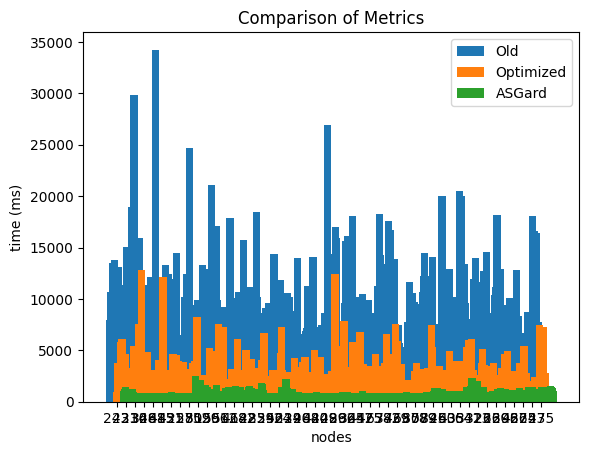

In [39]:
# quantile = merged['nodes_x'].quantile(0.95)
# plt_df = merged[merged['nodes_x'] < quantile]
plt_df = merged

positions = np.arange(len(plt_df['nodes_x']))
width = 0.8 * (700 - 100) / 3

# Create the grouped bar plot
plt.bar(positions - width, plt_df['time_x'], width=width, label='Old')
plt.bar(positions, plt_df['time_y'], width=width, label='Optimized')
plt.bar(positions + width, plt_df['time'], width=width, label='ASGard')


plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Metrics')
# Set the x-axis tick positions and labels
x_tick_positions = positions[::200]  # Show every second tick
x_tick_labels = plt_df['nodes_x'][::200]  # Use every second ID for tick labels
plt.xticks(x_tick_positions, x_tick_labels)
plt.legend()

# Display the plot
plt.show()

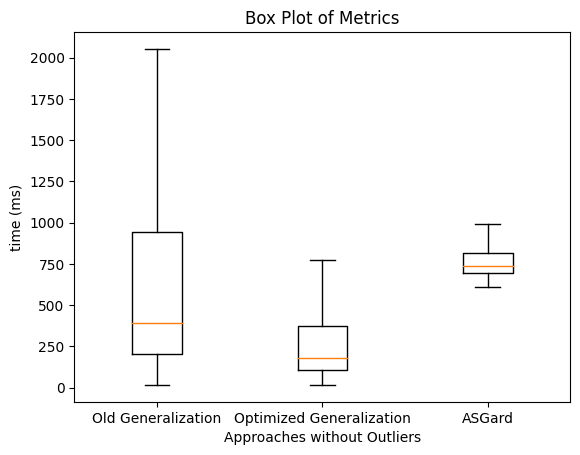

In [9]:
# quantile = merged['nodes_x'].quantile(0.95)
# plt_df = merged[merged['nodes_x'] < quantile]
plt_df = merged

# Combine the datasets into a list
data = [plt_df['time_x'], plt_df['time_y'], plt_df['time']]

# Create the box plot
plt.boxplot(data, showfliers=False)

# Customize the plot
plt.xlabel('Approaches without Outliers')
plt.ylabel('time (ms)')
plt.title('Box Plot of Metrics')

# Set the x-axis tick labels
plt.xticks([1, 2, 3], ['Old Generalization', 'Optimized Generalization', 'ASGard'])

# Display the plot
plt.show()

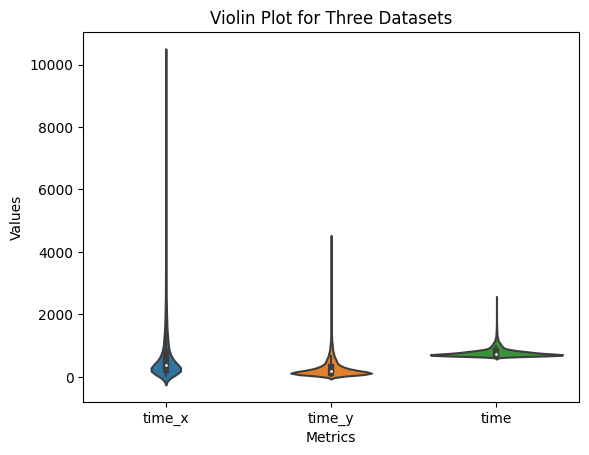

In [65]:
import seaborn as sns

quantile = merged['nodes_x'].quantile(0.95)
plt_df = merged[merged['nodes_x'] < quantile]
# plt_df = merged

melted_dataset = pd.melt(plt_df, value_vars=['time_x', 'time_y', 'time'])

# Create the violin plot using Seaborn
sns.violinplot(data=melted_dataset, x='variable', y='value', showfliers=False)

# Customize the plot
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot for Three Datasets')

# Display the plot
plt.show()

<Axes: xlabel='nodes', ylabel='time (ms)'>

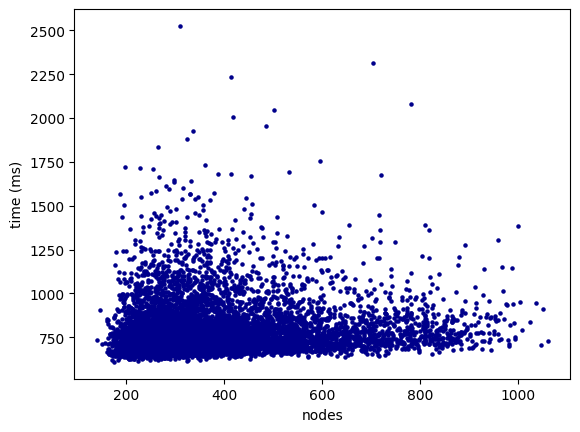

In [129]:
merged.plot.scatter(x='nodes', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='edges_x', ylabel='time (ms)'>

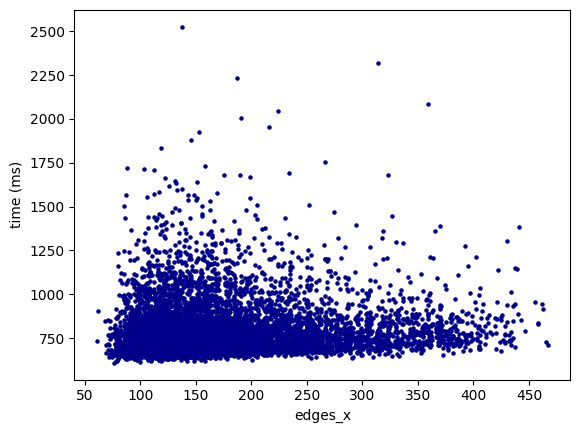

In [12]:
merged.plot.scatter(x='edges_x', y='time', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

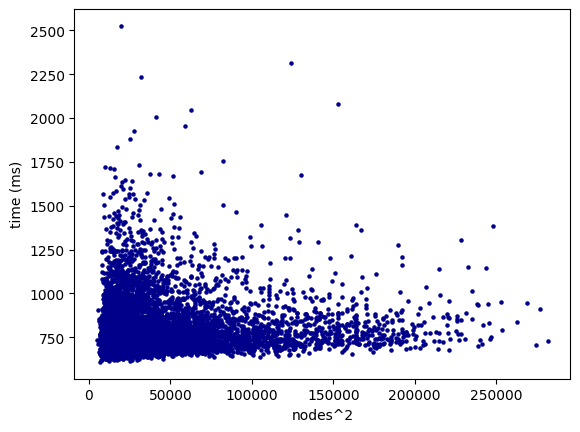

In [131]:
merged.plot.scatter(x='nodes^2', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes', ylabel='time (ms)'>

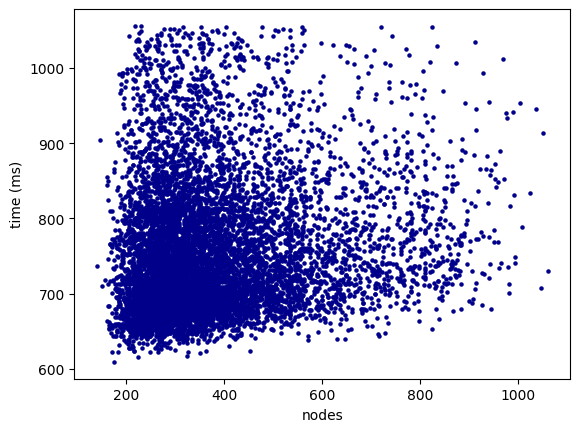

In [132]:
quantile = merged['time_y'].quantile(0.95)
merged[merged['time_y'] < quantile].plot.scatter(x='nodes', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

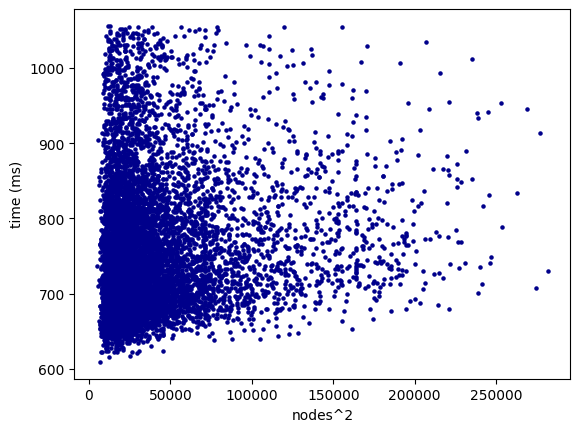

In [133]:
merged[merged['time_y'] < quantile].plot.scatter(x='nodes^2', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes^2')

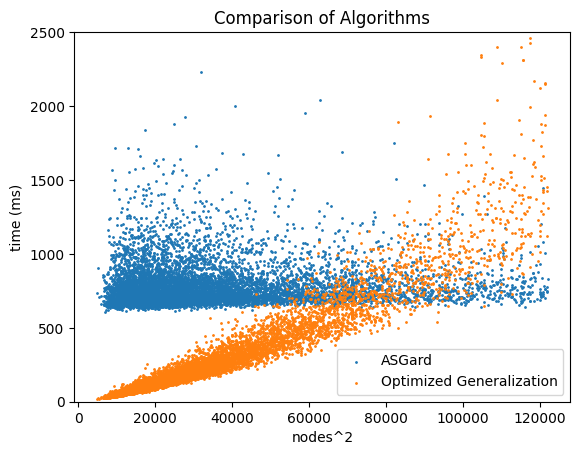

In [50]:
quantile = merged['nodes^2_x'].quantile(0.95)
plt_df = merged[merged['nodes^2_x'] < quantile]

# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes^2_x'], plt_df['time'], label='ASGard', s=1)
plt.scatter(plt_df['nodes^2_x'], plt_df['time_y'], label='Optimized Generalization', s=1)
# plt.scatter(plt_df['nodes^2_x'], plt_df['time_x'], label='Old Generalization', s=1)

# Customize the plot
plt.xlabel('nodes^2')
plt.ylabel('time (ms)')
plt.title('Comparison of Algorithms')
plt.ylim(0, 2500)
plt.legend()

# Display the plot
plt.show()

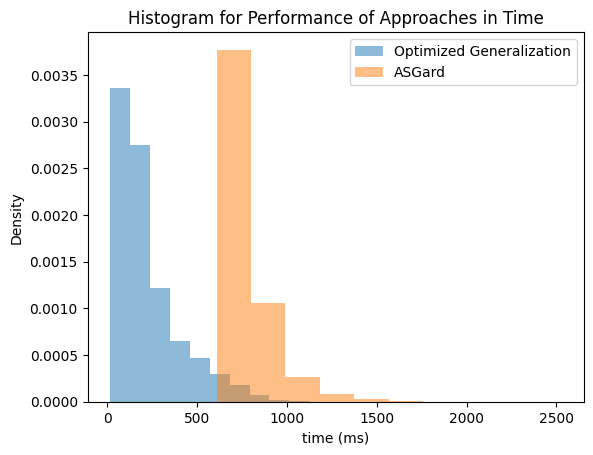

In [42]:
quantile = merged['time_x'].quantile(0.90)
plt_df = merged[merged['time_x'] < quantile]

# Plot the histograms for both columns
# plt.hist(plt_df['time_x'], alpha=0.5, label='Old Generalization', density=True)
plt.hist(plt_df['time_y'], alpha=0.5, label='Optimized Generalization', density=True)
plt.hist(plt_df['time'], alpha=0.5, label='ASGard', density=True)

# Customize the plot
plt.xlabel('time (ms)')
plt.ylabel('Density')
plt.title('Histogram for Performance of Approaches in Time')
plt.legend()

# Display the plot
plt.show()

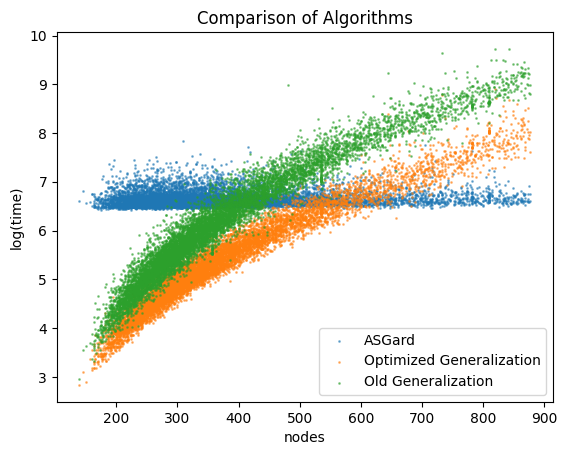

In [55]:
quantile = merged['nodes_x'].quantile(0.99)
plt_df = merged[merged['nodes_x'] < quantile]

# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes_x'], np.log(plt_df['time']), label='ASGard', s=1, alpha=0.5)
plt.scatter(plt_df['nodes_x'], np.log(plt_df['time_y']), label='Optimized Generalization', s=1, alpha=0.5)
plt.scatter(plt_df['nodes_x'], np.log(plt_df['time_x']), label='Old Generalization', s=1, alpha=0.5)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('log(time)')
plt.title('Comparison of Algorithms')
# plt.ylim(0, 4000)
plt.legend()

# Display the plot
plt.show()

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_87032/1256444538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['nodes_bin'] = pd.cut(plt_df['nodes_x'], bins=bin_edges, include_lowest=True)


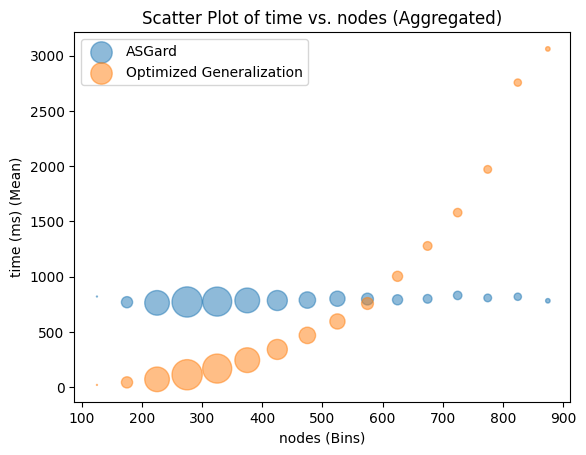

In [106]:
quantile = merged['nodes_x'].quantile(0.99)
plt_df = merged[merged['nodes_x'] < quantile]

# Define the bin edges for 'MetricA' range
bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
plt_df['nodes_bin'] = pd.cut(plt_df['nodes_x'], bins=bin_edges, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = plt_df.groupby('nodes_bin')['time'].mean().reset_index()
grouped_1_data['nodes_bin_numeric'] = grouped_1_data['nodes_bin'].apply(lambda x: x.mid)
grouped_1_data['weights'] = plt_df.groupby('nodes_bin')['time'].count().reset_index()['time'] / 4

grouped_2_data = plt_df.groupby('nodes_bin')['time_y'].mean().reset_index()
grouped_2_data['nodes_bin_numeric'] = grouped_2_data['nodes_bin'].apply(lambda x: x.mid)
grouped_2_data['weights'] = plt_df.groupby('nodes_bin')['time_y'].count().reset_index()['time_y'] / 4

grouped_3_data = plt_df.groupby('nodes_bin')['time_x'].mean().reset_index()
grouped_3_data['nodes_bin_numeric'] = grouped_3_data['nodes_bin'].apply(lambda x: x.mid)
grouped_3_data['weights'] = plt_df.groupby('nodes_bin')['time_x'].count().reset_index()['time_x'] / 4

# Create a scatter plot
plt.scatter(grouped_1_data['nodes_bin_numeric'], grouped_1_data['time'], label='ASGard', s=grouped_1_data['weights'], alpha=0.5)
plt.scatter(grouped_2_data['nodes_bin_numeric'], grouped_2_data['time_y'], label='Optimized Generalization', s=grouped_2_data['weights'], alpha=0.5)
# plt.scatter(grouped_3_data['nodes_bin_numeric'], grouped_3_data['time_x'], label='Old Generalization', s=grouped_3_data['weights'], alpha=0.5)

# Customize the plot
plt.xlabel('nodes (Bins)')
plt.ylabel('time (ms) (Mean)')
plt.title('Scatter Plot of time vs. nodes (Aggregated)')
plt.legend()

# Display the
plt.show()




/tmp/ipykernel_10606/993837032.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['log_time'] = np.log(plt_df['time'])
/tmp/ipykernel_10606/993837032.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['log_time_x'] = np.log(plt_df['time_x'])
/tmp/ipykernel_10606/993837032.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

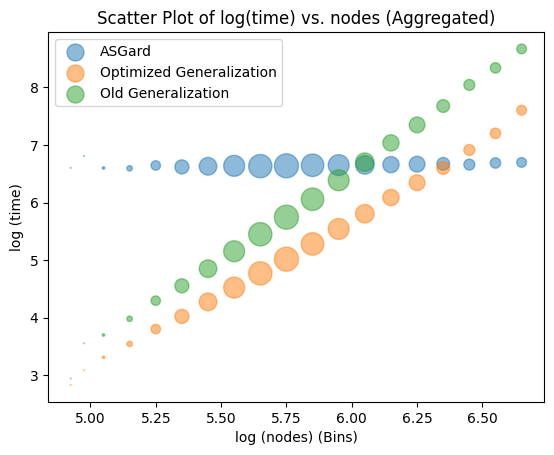

In [149]:
quantile = merged['nodes_x'].quantile(0.99)
plt_df = merged[merged['nodes_x'] < quantile]

# Define the bin edges for 'MetricA' range
# bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
# 4.941642 - 6.639876
bin_edges = [4.9, 4.95, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
plt_df['log_time'] = np.log(plt_df['time'])
plt_df['log_time_x'] = np.log(plt_df['time_x'])
plt_df['log_time_y'] = np.log(plt_df['time_y'])
plt_df['nodes_bin'] = pd.cut(np.log(plt_df['nodes_x']), bins=bin_edges, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = plt_df.groupby('nodes_bin')['log_time'].mean().reset_index()
grouped_1_data['nodes_bin_numeric'] = grouped_1_data['nodes_bin'].apply(lambda x: x.mid)
grouped_1_data['weights'] = plt_df.groupby('nodes_bin')['log_time'].count().reset_index()['log_time'] / 4

grouped_2_data = plt_df.groupby('nodes_bin')['log_time_y'].mean().reset_index()
grouped_2_data['nodes_bin_numeric'] = grouped_2_data['nodes_bin'].apply(lambda x: x.mid)
grouped_2_data['weights'] = plt_df.groupby('nodes_bin')['log_time_y'].count().reset_index()['log_time_y'] / 4

grouped_3_data = plt_df.groupby('nodes_bin')['log_time_x'].mean().reset_index()
grouped_3_data['nodes_bin_numeric'] = grouped_3_data['nodes_bin'].apply(lambda x: x.mid)
grouped_3_data['weights'] = plt_df.groupby('nodes_bin')['log_time_x'].count().reset_index()['log_time_x'] / 4

# Create a scatter plot
plt.scatter(grouped_1_data['nodes_bin_numeric'], grouped_1_data['log_time'], label='ASGard', s=grouped_1_data['weights'], alpha=0.5)
plt.scatter(grouped_2_data['nodes_bin_numeric'], grouped_2_data['log_time_y'], label='Optimized Generalization', s=grouped_2_data['weights'], alpha=0.5)
plt.scatter(grouped_3_data['nodes_bin_numeric'], grouped_3_data['log_time_x'], label='Old Generalization', s=grouped_3_data['weights'], alpha=0.5)

# Customize the plot
plt.xlabel('log (nodes) (Bins)')
plt.ylabel('log (time)')
plt.title('Scatter Plot of log(time) vs. nodes (Aggregated)')
plt.legend()

# Display the
plt.show()

In [155]:
df = pd.read_csv("ClassDiagramData.csv")
add_more_info(df)
df.head()

,library,version,time,g1_nodes,g2_nodes,g1_edges,g2_edges,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,metrics,diff_tool,nodes,edges,nodes^2,edges^2,nodesXedges
0,Joda Time,2.0-main vs 2.10-main,72,211,227,1645,1745,211,1609,11,134,14040,7641.0,438,3390,47897,2870525,1484820
1,Joda Time,2.0 vs 2.10,86,410,432,3626,3782,409,3576,19,217,16020,8878.0,842,7408,177120,13713532,6237536
2,JUnit,4.13 vs 5,8855,1171,2248,5529,2459,33,0,20,79,13706,NaN,3419,7988,2632408,13595811,27310972
3,JUnit,4.12 vs 4.13,397,948,1171,4397,5529,915,4057,67,787,5986,NaN,2119,9926,1110108,24311013,21033194
4,JUnit,4.12 vs 5,5608,948,2248,4397,2459,26,0,14,58,13780,NaN,3196,6856,2131104,10812223,21911776


In [161]:
df.describe()['metrics']

count       13.000000
mean     25302.692308
std      20087.889380
min       1387.000000
25%      13706.000000
50%      16020.000000
75%      38292.000000
max      61742.000000
Name: metrics, dtype: float64

<Axes: xlabel='nodes', ylabel='time (ms)'>

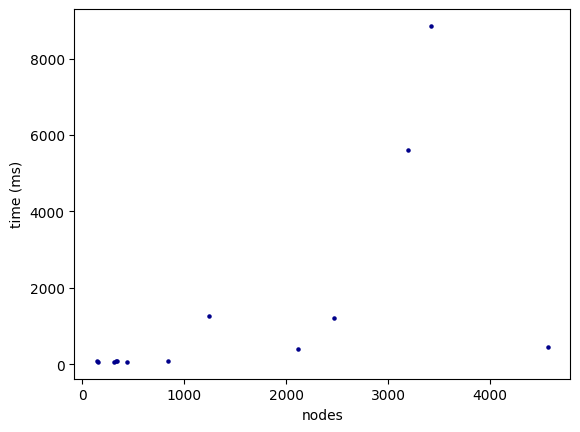

In [118]:
df.plot.scatter(x='nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='edges', ylabel='time (ms)'>

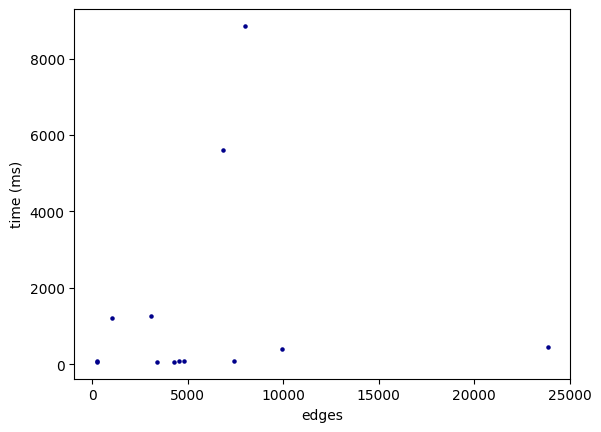

In [117]:
df.plot.scatter(x='edges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

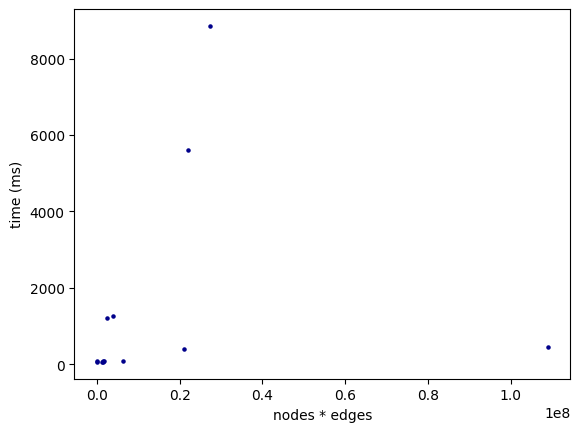

In [116]:
df.plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

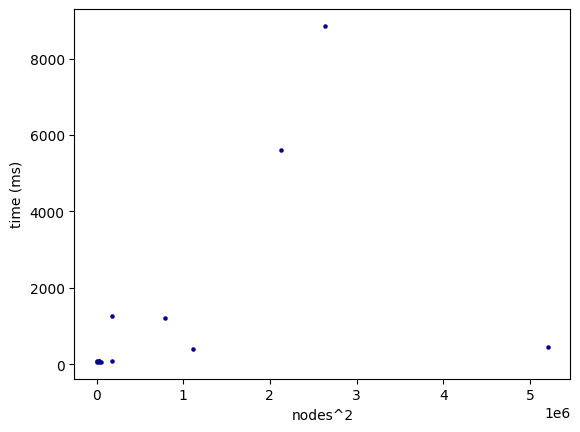

In [115]:
df.plot.scatter(x='nodes^2', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes^2')

<Axes: xlabel='generalization nodes', ylabel='time (ms)'>

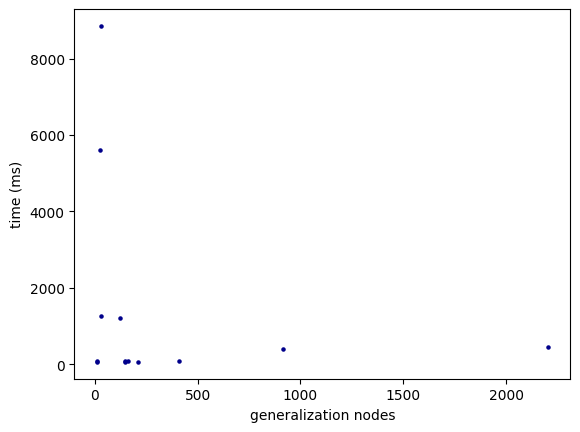

In [114]:
df.plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization nodes')

<Axes: xlabel='generalization edges', ylabel='time (ms)'>

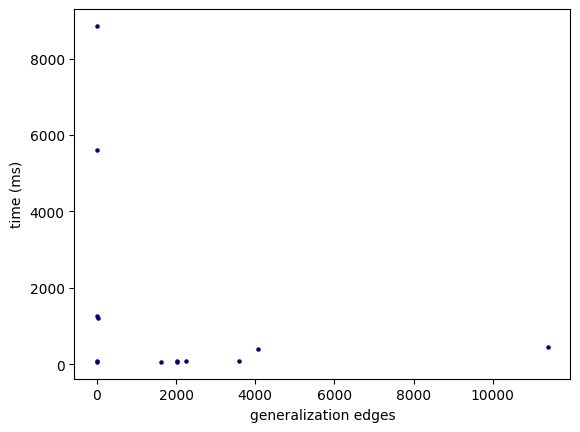

In [113]:
df.plot.scatter(x='generalization_edges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization edges')

In [168]:
df['uncommon_nodes'] = df['nodes'] - 2 * df['generalization_nodes']
df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
df['log_time'] = np.log(df['time'])
df['log_nodes'] = np.log(df['nodes'])
df['uncommon_edges'] = df['edges'] - 2 * df['generalization_edges']
df['log_uncommon_edges'] = np.log(df['uncommon_edges'])

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

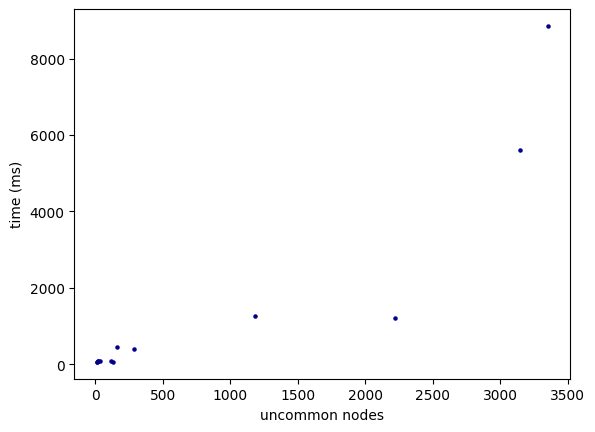

In [99]:
df.plot.scatter(x='uncommon_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

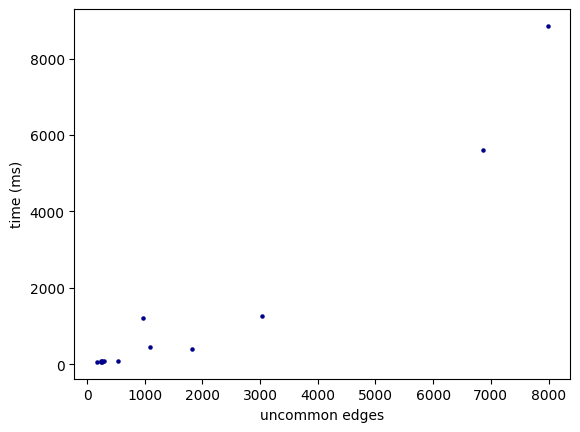

In [106]:
df.plot.scatter(x='uncommon_edges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

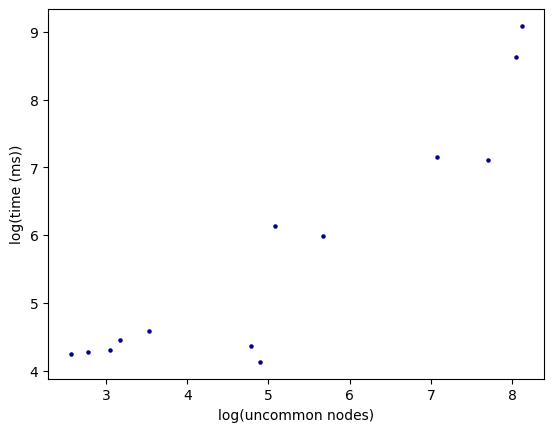

In [110]:
df.plot.scatter(x='log_uncommon_nodes', y='log_time', c='DarkBlue', s=5, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

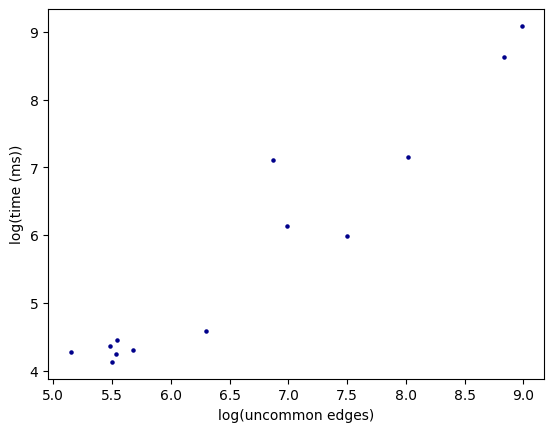

In [109]:
df.plot.scatter(x='log_uncommon_edges', y='log_time', c='DarkBlue', s=5, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

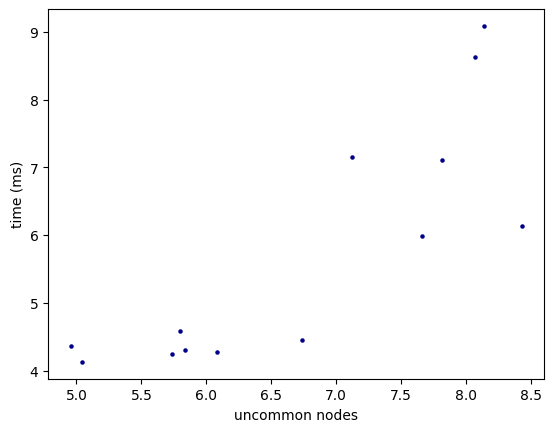

In [102]:
df.plot.scatter(x='log_nodes', y='log_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

In [4]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=2)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    return linear_regressor.coef_, linear_regressor.intercept_, r_squared

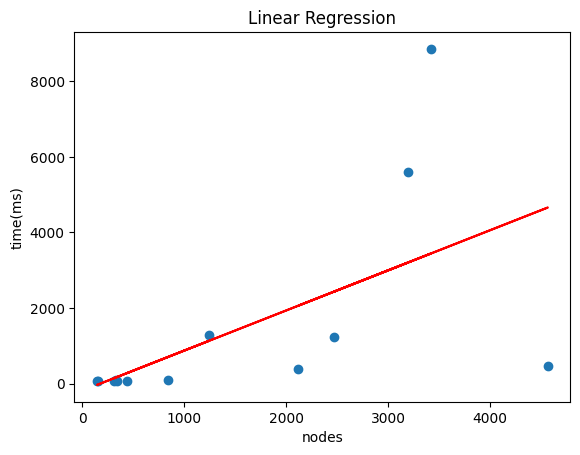

(array([[1.06133318]]), array([-185.38807533]))

In [165]:
linear_regression_of(df, 'nodes', 'time', y_label='time(ms)')

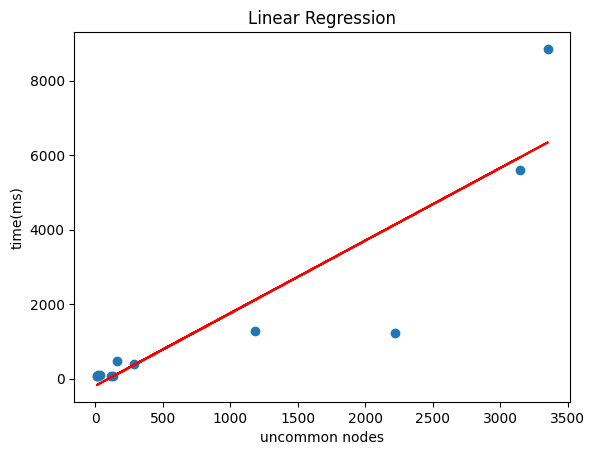

(array([[1.95096932]]), array([-195.59872303]))

In [169]:
linear_regression_of(df, 'uncommon_nodes', 'time', x_label='uncommon nodes', y_label='time(ms)')

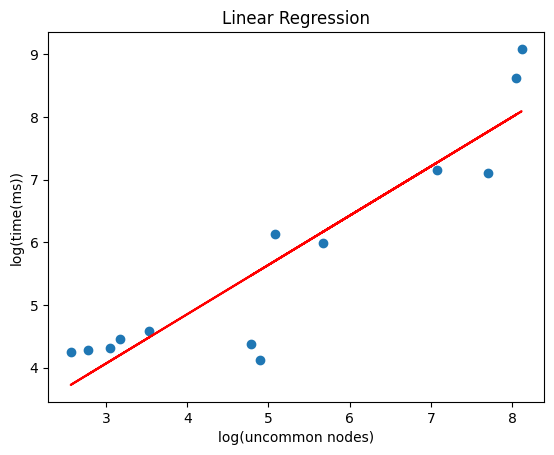

(array([[0.78715788]]), array([1.70317528]))

In [170]:
linear_regression_of(df, 'log_uncommon_nodes', 'log_time', x_label='log(uncommon nodes)', y_label='log(time(ms))')

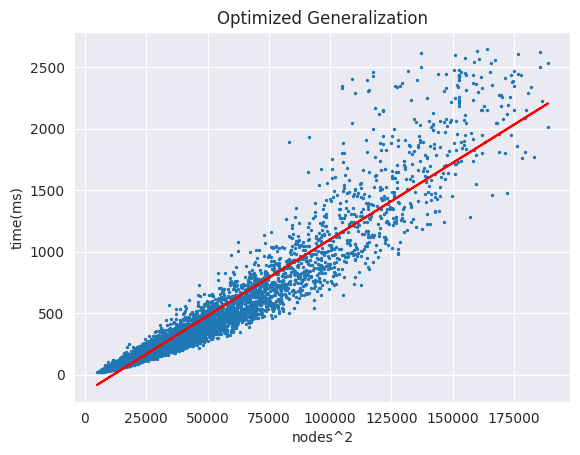

(array([[0.01243994]]), array([-144.84777883]), 0.9103040773189041)

In [70]:
quantile = merged['nodes^2_y'].quantile(0.99)
plt_df = merged[merged['nodes^2_y'] < quantile]

quantile = plt_df['time_y'].quantile(0.99)
plt_df = plt_df[plt_df['time_y'] < quantile]

linear_regression_of(plt_df, 'nodes^2_x', 'time_y', x_label='nodes^2', y_label='time(ms)', title='Optimized Generalization')

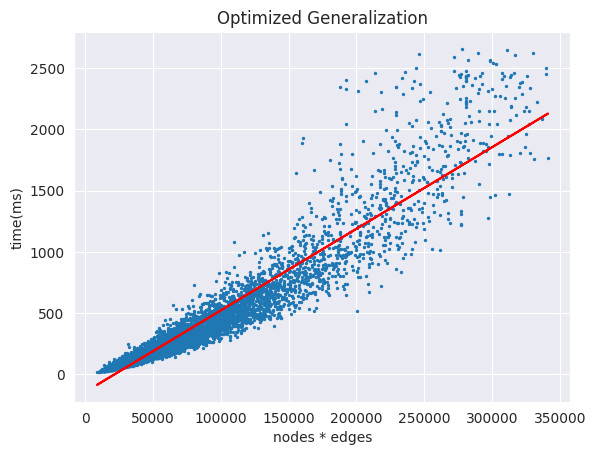

(array([[0.00665953]]), array([-142.79283345]), 0.9015359368897012)

In [62]:
quantile = merged['nodesXedges_y'].quantile(0.99)
plt_df = merged[merged['nodesXedges_y'] < quantile]

quantile = plt_df['time_y'].quantile(0.99)
plt_df = plt_df[plt_df['time_y'] < quantile]

linear_regression_of(plt_df, 'nodesXedges_y', 'time_y', x_label='nodes * edges', y_label='time(ms)', title='Optimized Generalization')

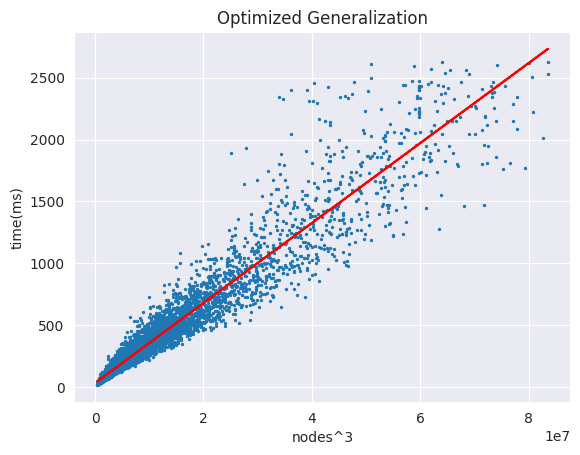

(array([[3.23142198e-05]]), array([32.81057696]), 0.930044946786141)

In [69]:
quantile = merged['nodes^3_y'].quantile(0.99)
plt_df = merged[merged['nodes^3_y'] < quantile]

quantile = plt_df['time_y'].quantile(0.99)
plt_df = plt_df[plt_df['time_y'] < quantile]

linear_regression_of(plt_df, 'nodes^3_y', 'time_y', x_label='nodes^3', y_label='time(ms)', title='Optimized Generalization')

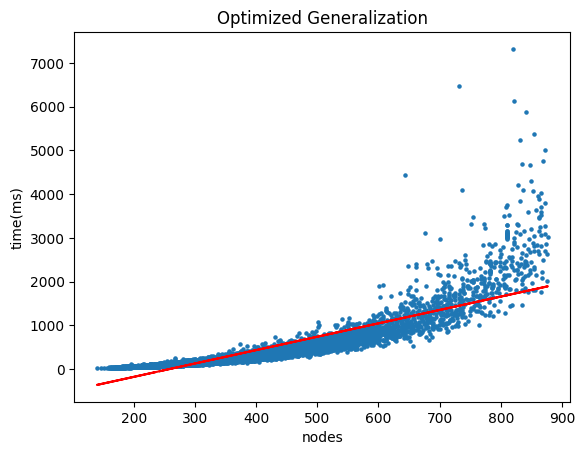

(array([[3.05989399]]), array([-792.84347235]))

In [176]:
linear_regression_of(plt_df, 'nodes_x', 'time_y', x_label='nodes', y_label='time(ms)', title='Optimized Generalization')

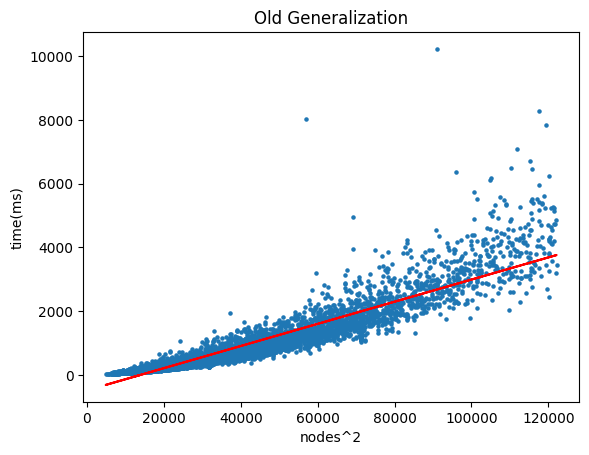

(array([[0.03475389]]), array([-482.88218821]))

In [137]:
linear_regression_of(plt_df, 'nodes^2_x', 'time_x', x_label='nodes^2', y_label='time(ms)', title='Old Generalization')

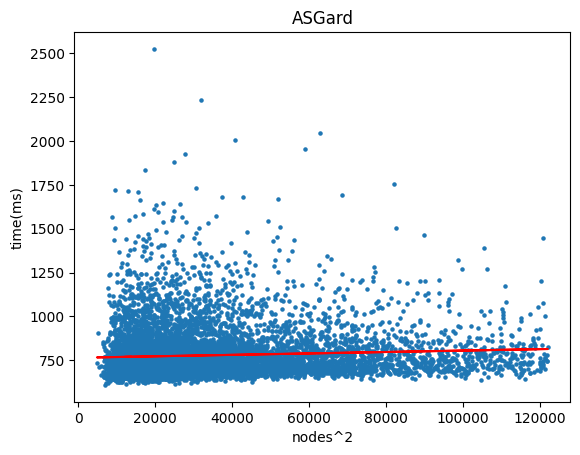

(array([[0.00040778]]), array([764.05616254]))

In [138]:
linear_regression_of(plt_df, 'nodes^2_x', 'time', x_label='nodes^2', y_label='time(ms)', title='ASGard')

In [14]:
plt_df['log_time_x'] = np.log(plt_df['time_x'])
plt_df['log_time_y'] = np.log(plt_df['time_y'])
plt_df['log_time'] = np.log(plt_df['time'])
plt_df['log_nodes'] = np.log(plt_df['nodes_x'])

/tmp/ipykernel_22454/2215064042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['log_time_x'] = np.log(plt_df['time_x'])
/tmp/ipykernel_22454/2215064042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['log_time_y'] = np.log(plt_df['time_y'])
/tmp/ipykernel_22454/2215064042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

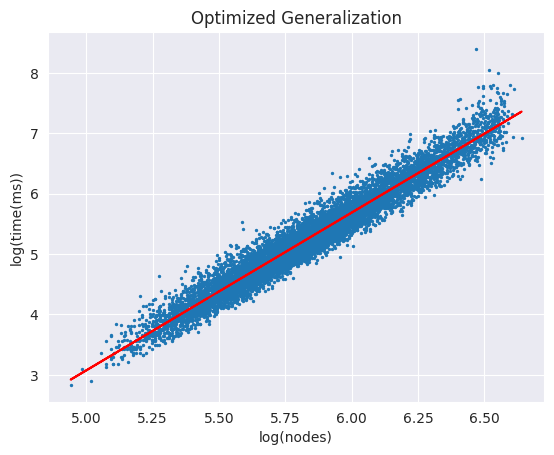

(array([[2.61410797]]), array([-9.9970061]), 0.9462769777199102)

In [15]:
linear_regression_of(plt_df, 'log_nodes', 'log_time_y', x_label='log(nodes)', y_label='log(time(ms))', title='Optimized Generalization')

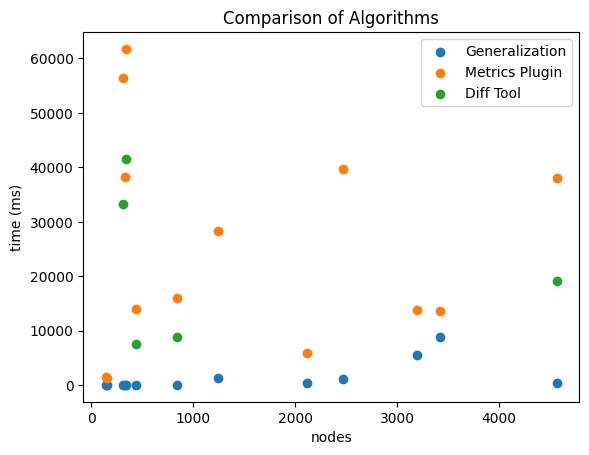

In [163]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes'], df['time'], label='Generalization')
plt.scatter(df['nodes'], df['metrics'], label='Metrics Plugin')
plt.scatter(df['nodes'], df['diff_tool'], label='Diff Tool')

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Algorithms')
plt.legend()

# Display the plot
plt.show()

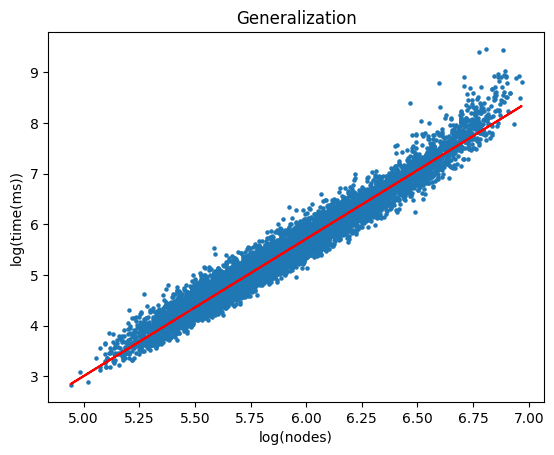

(array([[2.70449906]]), array([-10.51442898]), 0.9564765564031444)

In [181]:
merged['log_time_y'] = np.log(merged['time_y'])
merged['log_nodes_x'] = np.log(merged['nodes_x'])
linear_regression_of(merged, 'log_nodes_x', 'log_time_y', x_label='log(nodes)', y_label='log(time(ms))', title='Generalization')

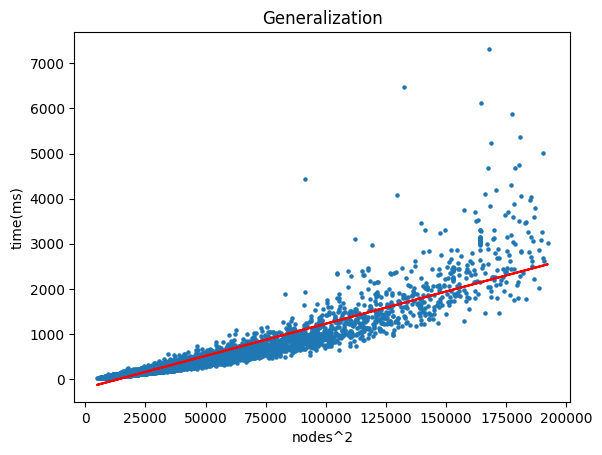

(array([[0.01427542]]), array([-200.25647202]), 0.8389499868357987)

In [183]:
linear_regression_of(plt_df, 'nodes^2_x', 'time_y', x_label='nodes^2', y_label='time(ms)', title='Generalization')

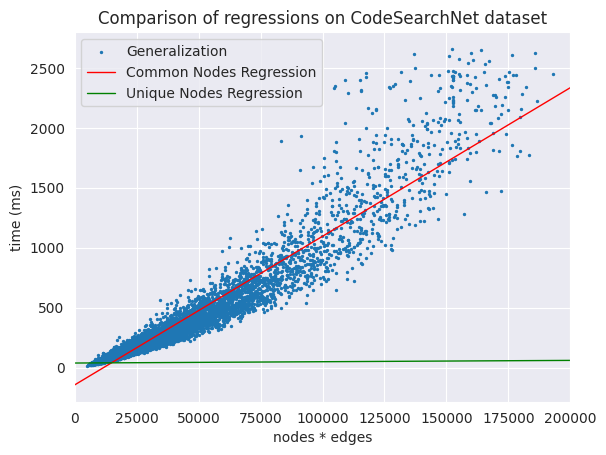

In [67]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes^2_y'], plt_df['time_y'], label='Generalization', s=2)
plt.axline((0, -144.84), (144.84/0.0124, 0), linewidth=1, color='r', label='Common Nodes Regression')
plt.axline((0, 37.77), (-37.77/0.00011, 0), linewidth=1, color='g', label='Unique Nodes Regression')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions on CodeSearchNet dataset')
plt.xlim(-100, 200000)
plt.legend()

# Display the plot
plt.show()

In [75]:
cddf = pd.read_csv('SeleniumClassDiagramData.csv')
add_more_info(cddf)
cddf.head()

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time,nodes,edges,nodes^2,nodes^3,edges^2,nodesXedges
0,1.0.11-all vs 1.0.11,1266,813,0,1373,1266,2205,1266,813,72,2532,3018,1602756,2.029089e+09,1792665,7641576
1,1.0.11-all vs 2.0.0-all,1253,2103,23,248,1266,2205,1294,2311,64,2560,4516,1638204,2.096901e+09,5095755,11560960
2,1.0.11-all vs 2.0.0,1253,773,23,1448,1266,2205,1294,822,74,2560,3027,1638204,2.096901e+09,1812510,7749120
3,1.0.11-all vs 2.10.0-all,1239,2047,56,411,1266,2205,1382,2504,83,2648,4709,1749612,2.316486e+09,5521320,12469432
4,1.0.11-all vs 2.10.0,1239,748,44,1512,1266,2205,1382,919,88,2648,3124,1749612,2.316486e+09,2026395,8272352


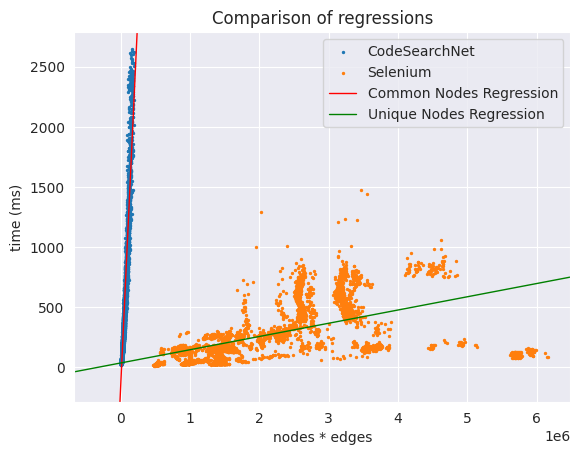

In [80]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes^2_y'], plt_df['time_y'], label='CodeSearchNet', s=2)
plt.scatter(cddf['nodesXedges']/4, cddf['time'], label='Selenium', s=2)
plt.axline((0, -144.84), (144.84/0.0124, 0), linewidth=1, color='r', label='Common Nodes Regression')
plt.axline((0, 37.77), (-37.77/0.00011, 0), linewidth=1, color='g', label='Unique Nodes Regression')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of regressions')
# plt.xlim(-100, 200000)
plt.legend()

# Display the plot
plt.show()